<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/06.%20Week%206/Clusteringweek06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import pdist, squareform
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style
plt.style.use('ggplot')
sns.set(style='whitegrid')

In [3]:
# 1. Load Data
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv"
df = pd.read_csv(url)

In [4]:
# 2. Eksplorasi Data Awal
print("Jumlah baris dan kolom:", df.shape)
print("\nInformasi dataframe:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())

# Melihat beberapa data awal
print("\nData awal:")
print(df.head())

Jumlah baris dan kolom: (7195, 22)

Informasi dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-

In [6]:
# 4. Preprocessing Data
X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

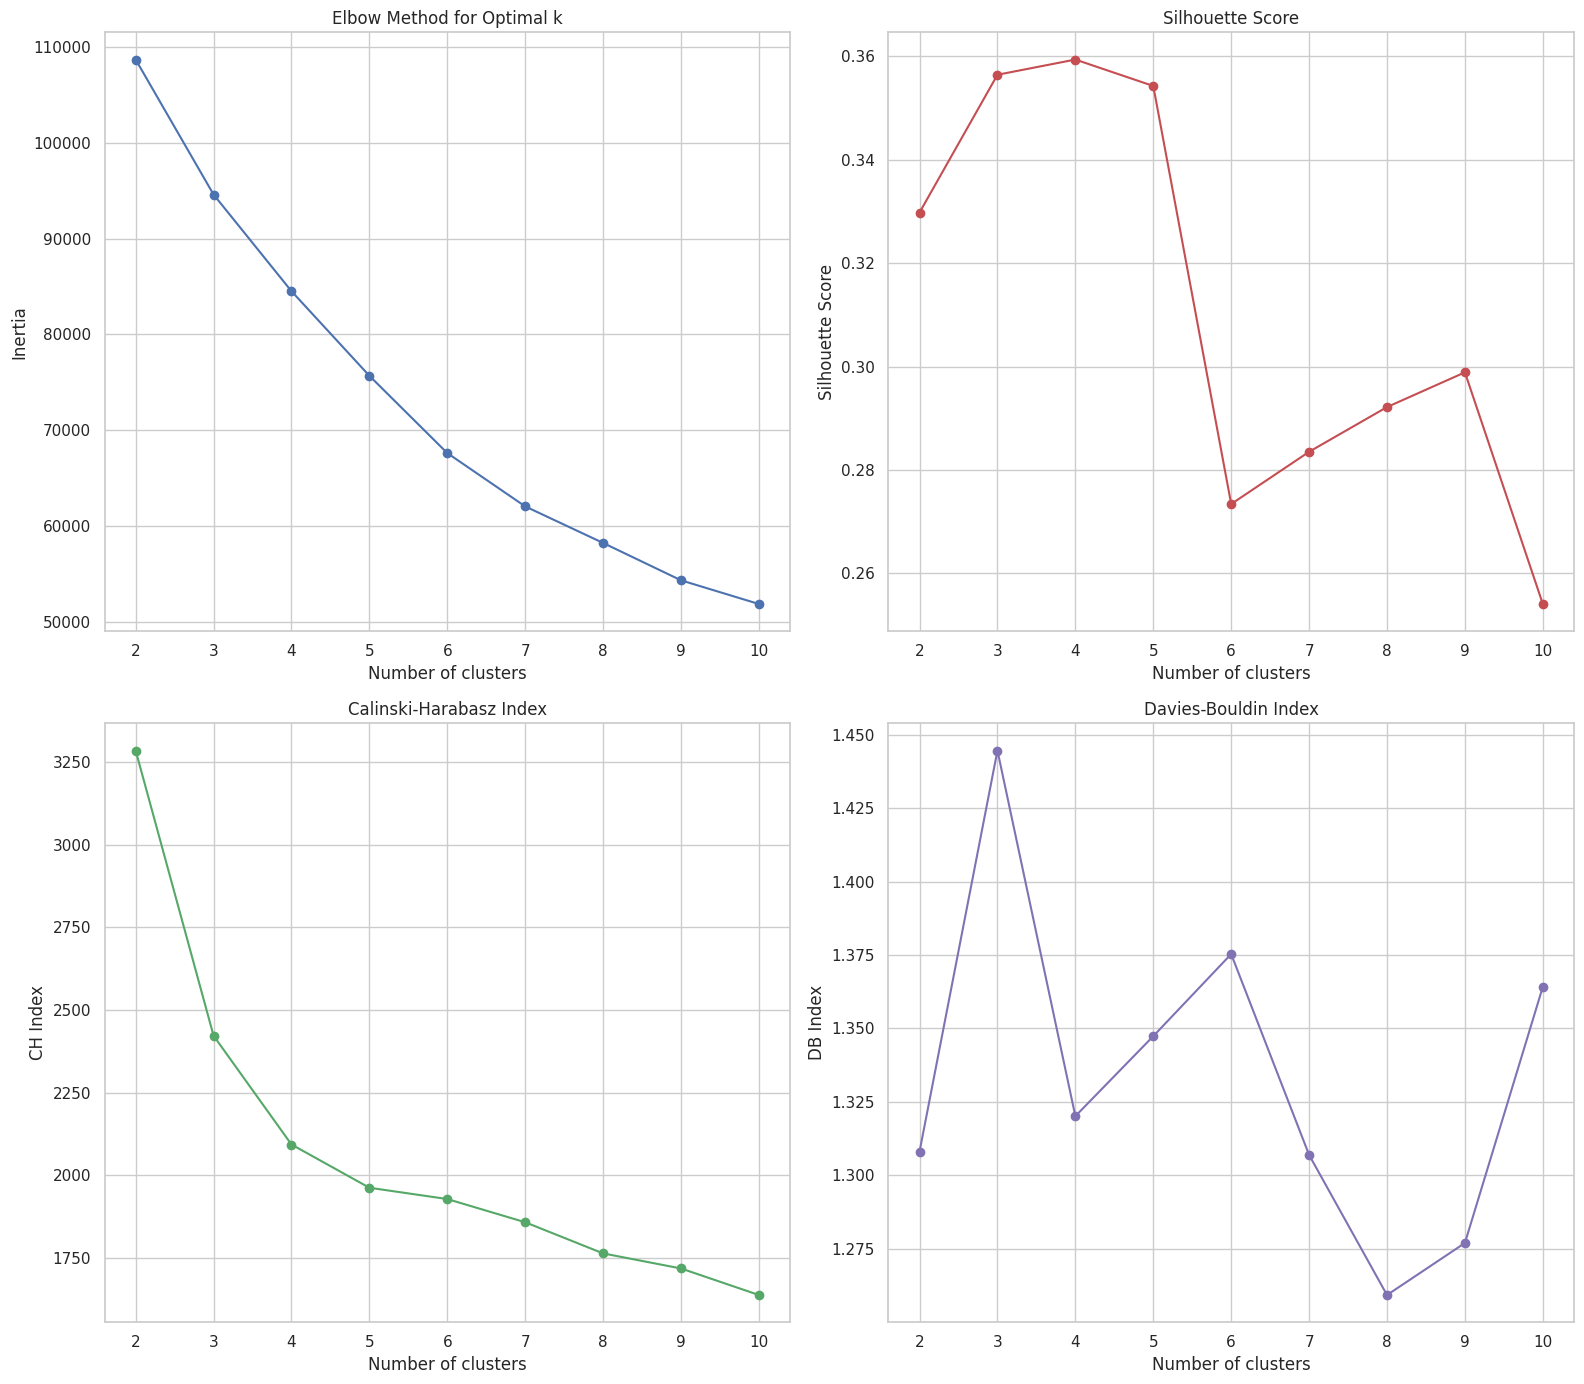

In [7]:
# 5. Metode Elbow untuk Menentukan Jumlah Cluster Optimal
inertia = []
silhouette_scores = []
ch_scores = []
db_scores = []
k_range = range(2, 11)

for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    # Simpan nilai inertia
    inertia.append(kmeans.inertia_)

    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    # Hitung Calinski-Harabasz Index
    ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    ch_scores.append(ch_score)

    # Hitung Davies-Bouldin Index
    db_score = davies_bouldin_score(X_scaled, kmeans.labels_)
    db_scores.append(db_score)

# Plot Elbow Method
plt.figure(figsize=(16, 14))

plt.subplot(2, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(k_range, ch_scores, 'go-')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters')
plt.ylabel('CH Index')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(k_range, db_scores, 'mo-')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.grid(True)

plt.tight_layout()
plt.savefig('metrics_comparison.png')
plt.show()

In [11]:
# Gunakan jumlah cluster terbaik berdasarkan Elbow/Silhouette
optimal_k = 4  # Ganti jika hasil Elbow/Silhouette menunjukkan angka lain

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, labels)

# Davies-Bouldin Index (semakin kecil semakin baik)
db_score = davies_bouldin_score(X_scaled, labels)

# Dunn Index (semakin besar semakin baik)
def dunn_index(X, labels):
    distances = squareform(pdist(X))
    unique_clusters = np.unique(labels)

    intra_dists = [np.max(distances[np.ix_(labels == k, labels == k)]) for k in unique_clusters]
    inter_dists = [np.min(distances[np.ix_(labels == i, labels == j)])
                   for i in unique_clusters for j in unique_clusters if i != j]

    return np.min(inter_dists) / np.max(intra_dists)

dunn = dunn_index(X_scaled, labels)

print("Evaluasi Clustering:")
print(f"Silhouette Score       : {silhouette_score(X_scaled, labels):.4f}")
print(f"Calinski-Harabasz Index: {ch_score:.2f}")
print(f"Davies-Bouldin Index   : {db_score:.4f}")
print(f"Dunn Index             : {dunn:.4f}")

Evaluasi Clustering:
Silhouette Score       : 0.3480
Calinski-Harabasz Index: 1980.55
Davies-Bouldin Index   : 1.4240
Dunn Index             : 0.0222


###Silhouette Score (0.3480)
merupakan metrik terbaik karena memberikan gambaran yang lebih seimbang tentang kepadatan dan pemisahan cluster. Nilai ini menunjukkan cluster yang cukup terpisah, meskipun ada sedikit overlapping.

## 1.  **Silhouette Score**

### **Rumus:**

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

* $a(i)$: rata-rata jarak antar titik $i$ ke **titik lain dalam klusternya sendiri** (kompaksi).
* $b(i)$: rata-rata jarak antar titik $i$ ke **titik dalam kluster terdekat lain** (pemisahan).
* $s(i) \in [-1, 1]$

### **Interpretasi:**

* $s(i)$ mendekati **1** → titik sangat cocok dengan klusternya.
* $s(i)$ mendekati **0** → titik berada di batas dua kluster.
* $s(i)$ negatif → titik mungkin salah kluster.

---

## 2.  **Calinski-Harabasz Index (CH Index)**

### **Rumus:**

$$
CH = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{n - k}{k - 1}
$$

* $\text{Tr}(B_k)$: jumlah variansi **antar cluster** (between-cluster dispersion)
* $\text{Tr}(W_k)$: jumlah variansi **dalam cluster** (within-cluster dispersion)
* $n$: jumlah total data
* $k$: jumlah cluster

### **Interpretasi:**

* Semakin **besar CH**, semakin **baik clustering** (cluster jauh satu sama lain dan padat di dalam).

---

## 3.  **Davies-Bouldin Index**

### **Rumus:**

$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{S_i + S_j}{M_{ij}} \right)
$$

* $S_i$: rata-rata jarak tiap titik ke centroid kluster $i$
* $M_{ij}$: jarak antara centroid kluster $i$ dan $j$

### **Interpretasi:**

* Semakin **rendah nilai DB**, semakin **baik** (cluster kompak dan jauh dari satu sama lain).

---

## 4.  **Dunn Index**

### **Rumus:**

$$
D = \frac{\min_{1 \leq i < j \leq k} d(c_i, c_j)}{\max_{1 \leq l \leq k} \delta_l}
$$

* $d(c_i, c_j)$: jarak minimum antar dua **cluster berbeda**
* $\delta_l$: diameter (maksimal jarak antar titik dalam) cluster $l$

### **Interpretasi:**

* Semakin **tinggi** Dunn Index, semakin **baik** clustering.
* Mengukur **rasio pemisahan antar cluster** dibanding **penyebaran internal cluster**.